<a href="https://colab.research.google.com/github/csun0602/Che-Sun-Data-analysis-Projects/blob/main/Che_Sun_kaggle_Competetion%EF%BC%9ASales_Forcast_and_Market_Analysis_for_Google_GStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Kaggle competetion: Sales Forcast and Market Analysis for Google GStore

**In this kaggle competition,we are challenged to analyze a Google Merchandise Store (also known as GStore) customer dataset to predict revenue per customer. I will use LGBM, PyTorch DeepModel to implement my algorithm.**

Google Analytics Customer Revenue Prediction

https://www.kaggle.com/c/ga-customer-revenue-prediction/overview

The 80/20 rule has proven true for many businesses-only a small percentage of customers produce most of the revenue. As such, marketing teams are challenged to make appropriate investments in promotional strategies.

GStore

RStudio, the developer of free and open tools for R and enterprise-ready products for teams to scale and share work, has partnered with Google Cloud and Kaggle to demonstrate the business impact that thorough data analysis can have.

In this competition, you're challenged to analyze a Google Merchandise Store (also known as GStore, where Google swag is sold) customer dataset to predict revenue per customer. Hopefully, the outcome will be more actionable operational changes and a better use of marketing budgets for those companies who choose to use data analysis on top of GA data.

Data Fields|description
---|---
fullVisitorId|A unique identifier for each user of the Google Merchandise Store.
channelGrouping | The channel via which the user came to the Store.
date | The date on which the user visited the Store.
device | The specifications for the device used to access the Store.
geoNetwork | This section contains information about the geography of the user.
socialEngagementType | Engagement type, either "Socially Engaged" or "Not Socially Engaged".
totals | This section contains aggregate values across the session.
trafficSource | This section contains information about the Traffic Source from which the session originated.
visitId | An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
visitNumber | The session number for this user. If this is the first session, then this is set to 1.
visitStartTime | The timestamp (expressed as POSIX time).
hits | This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
customDimensions | This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.
totals |This set of columns mostly includes high-level aggregate data.

### **LGB model** : https://www.kaggle.com/code/limpidsun/simple-exploration-baseline-ga-customer-revenue

## **Deep model:**

In [ ]:
# import google drive into colab：
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.21-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.21-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.21-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
# Specify the root directory of Google Drive, named drive
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

adc.json  drive  sample_data


In [ ]:
import os
os.chdir("drive/")
!ls

'Colab Notebooks'     kaggle			      QQ截图20181116185027.jpg
 DeepLearning	      Laidata_ML_projects	      Untitled0.ipynb
 drive		      Laidata_ML_projects.zip
 Hw1_SF_Crime.ipynb  'Laioffer2019 夏季1班.desktop'


In [ ]:
import numpy as np
import pandas as pd
import json
import os
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline

from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None

### 1. Look through the data

In [ ]:
data1 = pd.read_csv("kaggle/train.csv", nrows=2)
data1

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147


### 2. Expand Json format data into Columns

In [ ]:
def load_df(csv_path='kaggle/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    df = pd.read_csv(csv_path,converters={column: json.loads for column in JSON_COLUMNS},dtype={'fullVisitorId': 'str'},nrows=nrows)
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df
train = load_df()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



Loaded train.csv. Shape: (903653, 55)


In [ ]:
train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not ava

### 3. EDA
#### 3.1 Look at the consumption ratio

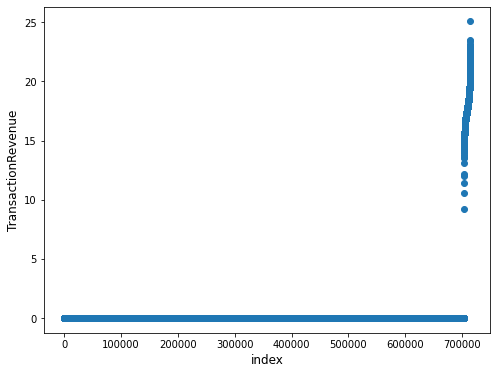

In [ ]:
train["totals.transactionRevenue"] = train["totals.transactionRevenue"].astype('float')
gdf = train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

**Through the graph, we can find there is small number of costumer would like to pay, can most people don't like to purchase**

In [ ]:
num_of_consumption_record = pd.notnull(train["totals.transactionRevenue"]).sum()
num_of_consumers = (gdf["totals.transactionRevenue"]>0).sum()

print("数据集中有{}条消费记录，约占数据集的{:.2f}%".format(num_of_consumption_record, num_of_consumption_record/train.shape[0] * 100))
print("数据集中有{}个消费者，约占数据集的{:.2f}%".format(num_of_consumers, num_of_consumers/gdf.shape[0] * 100))

数据集中有11515条消费记录，约占数据集的1.27%
数据集中有9996个消费者，约占数据集的1.40%


There are consumers who have made multiple purchases, but the overall proportion is small

3.2 Visualize the relationship between views and consumption and draw conclusions
**Tips:** groupby time, count transactionRevenue with NaN and without NaN.

In [ ]:
import datetime

def scatter_plot(cnt_srs, color):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace

train['date'] = train['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
cnt_srs = train.groupby('date')['totals.transactionRevenue'].agg(['size', 'count'])
cnt_srs.columns = ["count", "count of non-zero revenue"]
cnt_srs = cnt_srs.sort_index()
#cnt_srs.index = cnt_srs.index.astype('str')
trace1 = scatter_plot(cnt_srs["count"], 'red')
trace2 = scatter_plot(cnt_srs["count of non-zero revenue"], 'blue')

fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.08,
                          subplot_titles=["Date - Count", "Date - Non-zero Revenue count"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig['layout'].update(height=800, width=800, paper_bgcolor='rgb(233,233,233)', title="Date Plots")
py.iplot(fig, filename='date-plots')

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



**Conclusion:** There is no relationship between pageviews and consumption. The data can be divided into train and validation based on time.

###Feature Engineering

In [ ]:
train['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True)
train['trafficSource.isTrueDirect'].fillna(False, inplace=True)

# remove columns with only one distinct value
cols_to_drop = [col for col in train.columns if train[col].nunique(dropna=False) == 1]
train.drop(cols_to_drop, axis=1, inplace=True)

#only one not null value
train.drop(['trafficSource.campaignCode'], axis=1, inplace=True)

train.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1,1,1,NaN,(not set),google,organic,(not provided),False,NaN,NaN,NaN,NaN,NaN,True,NaN
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1,1,1,NaN,(not set),google,organic,(not provided),False,NaN,NaN,NaN,NaN,NaN,True,NaN
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,Windows,False,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1,1,1,NaN,(not set),google,organic,(not provided),False,NaN,NaN,NaN,NaN,NaN,True,NaN
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,Linux,False,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,1,1,NaN,(not set),google,organic,google + online,False,NaN,NaN,NaN,NaN,NaN,True,NaN
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,Android,True,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,1,NaN,NaN,(not set),google,organic,(not provided),True,NaN,NaN,NaN,NaN,NaN,True,NaN


**Use the np.log1p method to perform smoothing operations on numerical features:**

In [ ]:
num_cols = ['visitNumber', 'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits', 'totals.transactionRevenue']

for col in num_cols:
    train[col] = train[col].fillna(0)
    train[col] = train[col].astype(float)
    train[col] = np.log1p(train[col])

**And filling with 0 in other features**

In [ ]:
train['trafficSource.adContent'] = train['trafficSource.adContent'].fillna(0)
train['trafficSource.keyword'] = train['trafficSource.keyword'].fillna(0)
train['trafficSource.adwordsClickInfo.adNetworkType'] = train['trafficSource.adwordsClickInfo.adNetworkType'].fillna(0)
train['trafficSource.adwordsClickInfo.gclId'] = train['trafficSource.adwordsClickInfo.gclId'].fillna(0)
train['trafficSource.adwordsClickInfo.page'] = train['trafficSource.adwordsClickInfo.page'].fillna(0)
train['trafficSource.adwordsClickInfo.slot'] = train['trafficSource.adwordsClickInfo.slot'].fillna(0)


### *Challenge1: By looking at EDA, creat new column to add features

Example

In [ ]:
train['browser_category'] = train['device.browser'] + '_' + train['device.deviceCategory']
train['browser_operatingSystem'] = train['device.browser'] + '_' + train['device.operatingSystem']
train['source_country'] = train['trafficSource.source'] + '_' + train['geoNetwork.country']

Remove useless columns:

In [ ]:
no_use = ["date", "fullVisitorId", "sessionId", "visitId", "visitStartTime", 'totals.transactionRevenue', 'trafficSource.referralPath']
cat_cols = [col for col in train.columns if col not in num_cols and col not in no_use]


**Categorical Encoding:**  
1. [kaggle编码categorical feature总结](https://zhuanlan.zhihu.com/p/40231966)
2. [Embedding官方文档](https://pytorch.org/docs/stable/nn.html?highlight=embedding#torch.nn.Embedding)  
3. [怎样形象理解embedding](https://www.zhihu.com/question/38002635)

In [ ]:
max_values = {}
for col in cat_cols:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))
    max_values[col] = train[col].max() + 2  # From experience, a little than true value, has better

channelGrouping
device.browser
device.operatingSystem
device.isMobile
device.deviceCategory
geoNetwork.continent
geoNetwork.subContinent
geoNetwork.country
geoNetwork.region
geoNetwork.metro
geoNetwork.city
geoNetwork.networkDomain
trafficSource.campaign
trafficSource.source
trafficSource.medium
trafficSource.keyword
trafficSource.isTrueDirect
trafficSource.adwordsClickInfo.page
trafficSource.adwordsClickInfo.slot
trafficSource.adwordsClickInfo.gclId
trafficSource.adwordsClickInfo.adNetworkType
trafficSource.adwordsClickInfo.isVideoAd
trafficSource.adContent
browser_category
browser_operatingSystem
source_country


In [ ]:
max_values

{'browser_category': 91,
 'browser_operatingSystem': 120,
 'channelGrouping': 9,
 'device.browser': 55,
 'device.deviceCategory': 4,
 'device.isMobile': 3,
 'device.operatingSystem': 21,
 'geoNetwork.city': 650,
 'geoNetwork.continent': 7,
 'geoNetwork.country': 223,
 'geoNetwork.metro': 95,
 'geoNetwork.networkDomain': 28065,
 'geoNetwork.region': 377,
 'geoNetwork.subContinent': 24,
 'source_country': 3400,
 'trafficSource.adContent': 46,
 'trafficSource.adwordsClickInfo.adNetworkType': 4,
 'trafficSource.adwordsClickInfo.gclId': 17776,
 'trafficSource.adwordsClickInfo.isVideoAd': 3,
 'trafficSource.adwordsClickInfo.page': 10,
 'trafficSource.adwordsClickInfo.slot': 4,
 'trafficSource.campaign': 11,
 'trafficSource.isTrueDirect': 3,
 'trafficSource.keyword': 3661,
 'trafficSource.medium': 8,
 'trafficSource.source': 381}

**According to the Embedding size, Categories are divided into 2 categories, one category has a vocabulary of less than 50, and a category has a vocabulary of greater than 50. The subsequent NN network is divided into two branches for processing, and the parameters of the large vocabulary are set to twice the parameters of the small vocabulary**

In [ ]:
cat_col_labels1 = ["channelGrouping", "device.deviceCategory", "device.operatingSystem", "geoNetwork.continent",
                   "geoNetwork.subContinent", "trafficSource.adContent", "trafficSource.adwordsClickInfo.adNetworkType",
                   "trafficSource.adwordsClickInfo.isVideoAd", "trafficSource.adwordsClickInfo.page", "trafficSource.adwordsClickInfo.slot",
                   "trafficSource.campaign", "trafficSource.medium", "geoNetwork.region"]

cat_col_labels2 = ["browser_category", "browser_operatingSystem", "source_country", "device.browser", "geoNetwork.city",
                   "trafficSource.source", "trafficSource.keyword", "trafficSource.adwordsClickInfo.gclId", "geoNetwork.networkDomain",
                   "geoNetwork.country", "geoNetwork.metro", "geoNetwork.region"]

### 5. Data preparation (last 2 months of data as validation)

In [ ]:
import datetime

train = train.sort_values('date')

x_train = train[train["date"] <= pd.Timestamp(2017,5,31)]
x_val = train[train["date"] > pd.Timestamp(2017,5,31)]

y_train = x_train['totals.transactionRevenue']
y_val = x_val['totals.transactionRevenue']

x_train = x_train.drop(no_use, axis=1)
x_val = x_val.drop(no_use, axis=1)

In [ ]:
num_cols.remove("totals.transactionRevenue")
num_cols

['visitNumber',
 'totals.hits',
 'totals.pageviews',
 'totals.bounces',
 'totals.newVisits']

**Calculate the Embedding parameters of each category**

In [ ]:
emb_dims1 = []
emb_dims2 = []
for i in cat_col_labels1:
    emb_dims1.append((max_values[i], min((max_values[i]+1)//2, 50)))
for i in cat_col_labels2:
    emb_dims2.append((max_values[i], min((max_values[i]+1)//2, 50)))

### 6. Model Part
Example:[tabular data with categorical embeddings](https://yashuseth.blog/2018/07/22/pytorch-neural-network-for-tabular-data-with-categorical-embeddings/)

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

#### Customize TabularDataset, inherit DataSet, and return the desired data based on our data set

In [ ]:
class TabularDataset(Dataset):
    def __init__(self, x_data, y_data, cat_cols1, cat_cols2, num_cols):

        """
        data: pandas data frame;
        cat_cols: list of string, the names of the categorical columns in the data, will be passed through the embedding layers;
        num_cols: list of string
        y_data: the target
        """
        self.n = x_data.shape[0]
        self.y = y_data.astype(np.float32).values.reshape(-1, 1)

        self.cat_cols1 = cat_cols1
        self.cat_cols2 = cat_cols2
        self.num_cols = num_cols

        self.num_X = x_data[self.num_cols].astype(np.float32).values
        self.cat_X1 = x_data[self.cat_cols1].astype(np.int64).values
        self.cat_X2 = x_data[self.cat_cols2].astype(np.int64).values


    def print_data(self):
        return self.num_X, self.cat_X1, self.cat_X2, self.y

    def __len__(self):
        """
        total number of samples
        """
        return self.n

    def __getitem__(self, idx):
        """
        Generates one sample of data.
        """
        return [self.y[idx], self.num_X[idx], self.cat_X1[idx], self.cat_X2[idx]]

### NN Network（2分支-->分支合并-->主分支）
![Network figure](https://github.com/LianxinGao/kaggle/blob/master/pics/net.jpg?raw=true)

In [ ]:
class FeedForwardNN(nn.Module):
    def __init__(self, emb_dims1, emb_dims2, no_of_num, lin_layer_sizes, output_size, emb_dropout, lin_layer_dropouts):
        """
        emb_dims:           List of two element tuples;
        no_of_num:          Integer, the number of continuous features in the data;
        lin_layer_sizes:    List of integers. The size of each linear layer;
        output_size:        Integer, the size of the final output;
        emb_dropout:        Float, the dropout to be used after the embedding layers.
        lin_layer_dropouts: List of floats, the dropouts to be used after each linear layer.
        """
        super().__init__()

        # embedding layers
        self.emb_layers1 = nn.ModuleList([nn.Embedding(x, y) for x, y in emb_dims1])
        self.emb_layers2 = nn.ModuleList([nn.Embedding(x, y) for x, y in emb_dims2])

        # 计算各个emb参数数量，为后续Linear layer的输入做准备
        self.no_of_embs1 = sum([y for x, y in emb_dims1])
        self.no_of_embs2 = sum([y for x, y in emb_dims2])
        self.no_of_num = no_of_num

        # 分支1
        self.branch1 = nn.Linear(self.no_of_embs1, lin_layer_sizes[0])
        self.branch1_2 = nn.Linear(lin_layer_sizes[0], lin_layer_sizes[1])
        nn.init.kaiming_normal_(self.branch1.weight.data)
        nn.init.kaiming_normal_(self.branch1_2.weight.data)

        # 分支2
        self.branch2 = nn.Linear(self.no_of_embs2, lin_layer_sizes[0] * 2)
        self.branch2_2 = nn.Linear(lin_layer_sizes[0] * 2, lin_layer_sizes[1] * 2)
        nn.init.kaiming_normal_(self.branch2.weight.data)
        nn.init.kaiming_normal_(self.branch2_2.weight.data)

        # 主分支
        self.main_layer1 = nn.Linear(lin_layer_sizes[1] * 3 + self.no_of_num, lin_layer_sizes[2])
        self.main_layer2 = nn.Linear(lin_layer_sizes[2], lin_layer_sizes[3])

        # batch normal
        self.branch_bn_layers1 = nn.BatchNorm1d(lin_layer_sizes[0])
        self.branch_bn_layers2 = nn.BatchNorm1d(lin_layer_sizes[0] * 2)
        self.main_bn_layer = nn.BatchNorm1d(lin_layer_sizes[2])

        # Dropout Layers
        self.emb_dropout_layer = nn.Dropout(emb_dropout)
        self.dropout_layers = nn.ModuleList([nn.Dropout(size) for size in lin_layer_dropouts])

        # Output layer
        self.output_layer = nn.Linear(lin_layer_sizes[-1], output_size)
        nn.init.kaiming_normal_(self.output_layer.weight.data)

    def forward(self, num_data, cat_data1, cat_data2):
        # embedding categorical feature and cat them together
        x1 = [emb_layer(torch.tensor(cat_data1[:, i])) for i, emb_layer in enumerate(self.emb_layers1)]
        x1 = torch.cat(x1, 1)

        x1 = self.emb_dropout_layer(F.relu(self.branch1(x1)))
        x1 = self.branch_bn_layers1(x1)
        x1 = self.dropout_layers[0](F.relu(self.branch1_2(x1)))

        x2 = [emb_layer(torch.tensor(cat_data2[:, i])) for i, emb_layer in enumerate(self.emb_layers2)]
        x2 = torch.cat(x2, 1)

        x2 = self.emb_dropout_layer(F.relu(self.branch2(x2)))
        x2 = self.branch_bn_layers2(x2)
        x2 = self.dropout_layers[0](F.relu(self.branch2_2(x2)))

        main = torch.cat([x1, x2, num_data], 1)

        main = self.dropout_layers[1](F.relu(self.main_layer1(main)))
        main = self.main_bn_layer(main)
        main = self.dropout_layers[2](F.relu(self.main_layer2(main)))

        out = self.output_layer(main)
        return out

In [ ]:
train_dataset = TabularDataset(x_data=x_train, y_data=y_train, cat_cols1=cat_col_labels1, cat_cols2=cat_col_labels2, num_cols=num_cols)
val_dataset = TabularDataset(x_data=x_val, y_data=y_val, cat_cols1=cat_col_labels1, cat_cols2=cat_col_labels2, num_cols=num_cols)

In [ ]:
batchsize = 64
train_dataloader = DataLoader(train_dataset, batchsize, shuffle=True, num_workers=0)
val_dataloder = DataLoader(val_dataset, 64, shuffle=True, num_workers=0)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FeedForwardNN(emb_dims1=emb_dims1,
                      emb_dims2=emb_dims2,
                      no_of_num=len(num_cols),
                      lin_layer_sizes=[128,64,32,16],
                      output_size=1,
                      lin_layer_dropouts=[0.1, 0.1, 0.05],
                      emb_dropout=0.05).to(device)

#### Start Train

In [ ]:
no_of_epochs = 5
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
total_data = train_dataset.__len__()

print_every = 500
steps = 0
running_loss = 0
for epoch in range(no_of_epochs):
    model.train()
    for index, datas in enumerate(train_dataloader):
        steps += 1
        y, num_x, cat_x1, cat_x2 = datas
        cat_x1 = cat_x1.to(device)
        cat_x2 = cat_x2.to(device)
        num_x = num_x.to(device)
        y  = y.to(device)

        # Forward Pass
        optimizer.zero_grad()
        preds = model.forward(num_x, cat_x1, cat_x2)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if steps % print_every == 0:
            val_loss = 0
            model.eval()
            with torch.no_grad():
                for val_index, val_datas in enumerate(val_dataloder):
                    y, num_x, cat_x1, cat_x2 = val_datas
                    cat_x1 = cat_x1.to(device)
                    cat_x2 = cat_x2.to(device)
                    num_x = num_x.to(device)
                    y  = y.to(device)

                    out = model.forward(num_x, cat_x1, cat_x2)
                    batch_loss = criterion(out, y)
                    val_loss += batch_loss.item()

            print(f"Epoch {epoch+1}/{no_of_epochs}.."
                     f"Train loss:{running_loss/print_every:.3f}.."
                     f"Validation loss:{val_loss/len(val_dataloder):.3f}..")
            running_loss = 0
            model.train()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Epoch 1/5..Train loss:4.159..Validation loss:4.310..
Epoch 1/5..Train loss:3.816..Validation loss:4.173..
Epoch 1/5..Train loss:3.375..Validation loss:3.975..
Epoch 1/5..Train loss:3.648..Validation loss:3.778..
Epoch 1/5..Train loss:3.423..Validation loss:3.706..
Epoch 1/5..Train loss:3.224..Validation loss:3.649..
Epoch 1/5..Train loss:3.266..Validation loss:3.617..
Epoch 1/5..Train loss:3.117..Validation loss:3.445..
Epoch 1/5..Train loss:3.066..Validation loss:3.555..
Epoch 1/5..Train loss:3.295..Validation loss:3.398..
Epoch 1/5..Train loss:3.288..Validation loss:3.321..
Epoch 1/5..Train loss:3.286..Validation loss:3.298..
Epoch 1/5..Train loss:3.263..Validation loss:3.335..
Epoch 1/5..Train loss:3.008..Validation loss:3.332..
Epoch 1/5..Train loss:3.052..Validation loss:3.295..
Epoch 1/5..Train loss:3.054..Validation loss:3.279..
Epoch 1/5..Train loss:2.990..Validation loss:3.307..
Epoch 1/5..Train loss:3.131..Validation loss:3.272..
Epoch 1/5..Train loss:3.027..Validation loss:3